In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import akshare as ak
import datetime
import numpy as np

In [2]:
import pymongo

uri = 'mongodb://localhost:27017'

client = pymongo.MongoClient(uri)
coll = client.quantaxis.easymoney_sentiment

In [3]:
def sentiment_stat(sentiment_df, out_table_name = "sens_stat.tsv", group="date"):
    sentiment_df["date"] = sentiment_df["post_publish_time"].map(lambda x: str(x).split(" ")[0])
    nums = sentiment_df["cemotion_sentiment"].groupby(sentiment_df[group]).count()
    sums = sentiment_df["cemotion_sentiment"].groupby(sentiment_df[group]).sum()
    sums_comment = sentiment_df["post_comment_count"].groupby(sentiment_df[group]).sum() 
    day_senti = pd.DataFrame()   
    day_senti["num"] = nums
    day_senti["sum"] = sums
    day_senti["senti_value"] = sums/nums
    day_senti["sum_value"] = sums_comment
    return day_senti

In [4]:
def find2mongo2df():
    records = coll.find({"post_publish_time": {"$gt": "2022"}}, {"post_id":1, "post_publish_time":1 , "post_comment_count":1, "cemotion_sentiment":1})
    return pd.DataFrame(list(records))

In [5]:
coll.find({})

In [6]:
sentiment_df = find2mongo2df()

In [56]:
int("09") +1

10

In [7]:
def time_split(time):
    day, clock = time.split(" ")
    hour, minu, sec = time.split(" ")[1].split(":")
    if minu < "30":
        clock_new = ":".join([hour, "30", "00"])
    else:
        hour = str(int(hour) +1)
        clock_new = ":".join([hour, "00", "00"])
    return(" ".join([day, clock_new]))


sentiment_df["split_time"] = sentiment_df["post_publish_time"].map(time_split)

In [403]:
sentiment_df[20:40]

,_id,post_id,post_comment_count,post_publish_time,cemotion_sentiment,split_time
20,64fc77dabb40c686560f1d9b,1346761584,75,2023-08-30 12:51:24,0.000120,2023-08-30 13:00:00
21,64fc77dabb40c686560f1d9c,1346996712,0,2023-08-30 23:27:44,0.999549,2023-08-30 23:30:00
22,64fc77dabb40c686560f1d9d,1346318202,198,2023-08-29 13:15:41,0.482167,2023-08-29 13:30:00
23,64fc77dabb40c686560f1d9e,1346996599,0,2023-08-30 23:26:40,0.998896,2023-08-30 23:30:00
24,64fc77dabb40c686560f1d9f,1346921824,47,2023-08-30 18:05:59,0.000037,2023-08-30 18:30:00
25,64fc77dabb40c686560f1da0,1345994780,87,2023-08-28 17:17:03,0.000302,2023-08-28 17:30:00
26,64fc77dabb40c686560f1da1,1346598784,76,2023-08-30 09:33:24,0.003095,2023-08-30 10:00:00
27,64fc77dabb40c686560f1da2,1346481139,70,2023-08-29 19:36:03,0.088709,2023-08-29 20:00:00
28,64fc77dabb40c686560f1da3,1346989619,3,2023-08-30 22:38:01,0.388692,2023-08-30 23:00:00
29,64fc77dabb40c686560f1da4,1346996285,0,2023-08-30 23:23:40,0.004313,2023-08-30 23:30:00


In [404]:
sentiment_df

,_id,post_id,post_comment_count,post_publish_time,cemotion_sentiment,split_time
0,64fc77dabb40c686560f1d87,1345378923,41,2023-08-26 10:56:12,0.999960,2023-08-26 11:00:00
1,64fc77dabb40c686560f1d88,1346996219,1,2023-08-30 23:23:03,0.000157,2023-08-30 23:30:00
2,64fc77dabb40c686560f1d89,1346581010,6,2023-08-30 09:18:44,0.999962,2023-08-30 09:30:00
3,64fc77dabb40c686560f1d8a,1346996547,1,2023-08-30 23:26:13,0.025984,2023-08-30 23:30:00
4,64fc77dabb40c686560f1d8b,1346997329,0,2023-08-30 23:33:05,0.000129,2023-08-30 24:00:00
...,...,...,...,...,...,...
1022777,65bde18f5ce6569234b69f8d,1397063174,1,2024-02-01 15:13:45,0.001327,2024-02-01 15:30:00
1022778,65bde18f5ce6569234b69f8e,1397106602,0,2024-02-01 18:36:52,0.000271,2024-02-01 19:00:00
1022779,65bde18f5ce6569234b69f8f,1397106561,0,2024-02-01 18:36:32,0.055640,2024-02-01 19:00:00
1022780,65bde18f5ce6569234b69f90,1396999790,5,2024-02-01 13:39:23,0.204565,2024-02-01 14:00:00


In [8]:
sentiment_stat_df = sentiment_stat(sentiment_df)

In [9]:
sentiment_stat_df_min = sentiment_stat(sentiment_df, group="split_time")
sentiment_stat_df_min["datetime"] = sentiment_stat_df_min.index

In [10]:
sentiment_stat_df_min[-60:]

,num,sum,senti_value,sum_value,datetime
split_time,,,,,
2024-02-04 20:00:00,26,11.252024,0.432770,388,2024-02-04 20:00:00
2024-02-04 20:30:00,22,4.215869,0.191630,66,2024-02-04 20:30:00
2024-02-04 21:00:00,19,11.316505,0.595606,120,2024-02-04 21:00:00
2024-02-04 21:30:00,27,10.400937,0.385220,80,2024-02-04 21:30:00
2024-02-04 22:00:00,18,8.018188,0.445455,52,2024-02-04 22:00:00
2024-02-04 22:30:00,19,5.869914,0.308943,130,2024-02-04 22:30:00
2024-02-04 23:00:00,13,5.612413,0.431724,19,2024-02-04 23:00:00
2024-02-04 23:30:00,30,11.888235,0.396274,35,2024-02-04 23:30:00
2024-02-04 24:00:00,31,5.212254,0.168137,30,2024-02-04 24:00:00


In [11]:
sh_pd = ak.stock_zh_index_daily(symbol="sh000001")
sh_pd2 = ak.stock_zh_index_daily(symbol="sh000852")
sh_pd3 = ak.stock_zh_index_daily(symbol="sh000985")
sh_pd4 = ak.stock_zh_index_daily(symbol="sz399006")

In [12]:
sentiment_stat_df["date_str"] =  sentiment_stat_df.index
sentiment_stat_df["date1"] = pd.to_datetime(sentiment_stat_df['date_str'], format='%Y-%m-%d')
sentiment_stat_df["date2"] = sentiment_stat_df['date1'].map(lambda x: datetime.datetime(x.year, x.month, x.day))

In [13]:
sh_pd2["date"] = sh_pd2["date"].map(lambda x: datetime.datetime(x.year, x.month, x.day))

In [13]:
sh_pd["date"] = sh_pd["date"].map(lambda x: datetime.datetime(x.year, x.month, x.day))
sh_pd3["date"] = sh_pd3["date"].map(lambda x: datetime.datetime(x.year, x.month, x.day))
sh_pd4["date"] = sh_pd4["date"].map(lambda x: datetime.datetime(x.year, x.month, x.day))

In [352]:
sentiment_stat_df

In [14]:
df = pd.merge(left=sh_pd2[["date", "close", "volume"]],
             right=sentiment_stat_df[["date1", "num", "sum", "senti_value", "sum_value"]],
             left_on=["date"], right_on=["date1"])

In [15]:
sentiment_stat_df["datetime"] = sentiment_stat_df.index

In [137]:
# sh_min_pd2 = ak.index_zh_a_hist_min_em(symbol="000852", period=30, start_date="2020-12-11 09:30:00", end_date="2024-12-11 19:00:00")

,时间,开盘,收盘,最高,最低,涨跌幅,涨跌额,成交量,成交额,振幅,换手率
4,2023-12-04 13:30:00,6137.67,6128.71,6138.07,6122.31,-0.15,-8.90,12070746,1.347601e+10,0.26,0.13
5,2023-12-04 14:00:00,6128.97,6130.41,6147.05,6127.73,0.03,1.70,12191170,1.319189e+10,0.32,0.13
6,2023-12-04 14:30:00,6130.33,6114.62,6130.78,6112.59,-0.26,-15.79,12070972,1.347259e+10,0.30,0.13
7,2023-12-04 15:00:00,6114.52,6114.39,6122.02,6114.39,0.00,-0.23,17297744,1.953526e+10,0.12,0.18
8,2023-12-05 10:00:00,6098.12,6046.29,6114.39,6044.94,-1.11,-68.10,41975323,5.108166e+10,1.14,0.44
...,...,...,...,...,...,...,...,...,...,...,...
251,2024-01-17 11:30:00,5488.33,5492.18,5492.81,5480.01,0.07,4.08,6640420,6.668172e+09,0.23,0.07
252,2024-01-17 13:30:00,5491.36,5460.11,5491.36,5459.26,-0.58,-32.07,8370324,8.741362e+09,0.58,0.09
253,2024-01-17 14:00:00,5460.27,5454.51,5467.18,5452.86,-0.10,-5.60,8312882,8.736233e+09,0.26,0.09
254,2024-01-17 14:30:00,5454.62,5448.08,5454.91,5435.29,-0.12,-6.43,10900402,1.060038e+10,0.36,0.11


In [413]:
sentiment_stat_df

,num,sum,senti_value,sum_value,date_str,date1,date2,datetime
date,,,,,,,,
2023-01-01,274,150.386683,0.548857,2132,2023-01-01,2023-01-01,2023-01-01,2023-01-01
2023-01-02,268,106.359745,0.396865,2947,2023-01-02,2023-01-02,2023-01-02,2023-01-02
2023-01-03,1453,515.041686,0.354468,6553,2023-01-03,2023-01-03,2023-01-03,2023-01-03
2023-01-04,1497,441.958517,0.295229,3407,2023-01-04,2023-01-04,2023-01-04,2023-01-04
2023-01-05,1825,562.116034,0.308009,4258,2023-01-05,2023-01-05,2023-01-05,2023-01-05
...,...,...,...,...,...,...,...,...
2024-01-30,6589,1738.921101,0.263913,7912,2024-01-30,2024-01-30,2024-01-30,2024-01-30
2024-01-31,8684,2202.135806,0.253585,11521,2024-01-31,2024-01-31,2024-01-31,2024-01-31
2024-02-01,6389,1672.953521,0.261849,7858,2024-02-01,2024-02-01,2024-02-01,2024-02-01


In [24]:
from QUANTAXIS.QAFetch.QAQuery import QA_fetch_etf_min

ImportError: cannot import name 'QA_fetch_etf_min' from 'QUANTAXIS.QAFetch.QAQuery' (/liubinxu/liubinxu/miniconda3/lib/python3.10/site-packages/QUANTAXIS/QAFetch/QAQuery.py)

In [23]:
df000852 = QA_fetch_etf_min("000852", "2023-01-01", "2030-01-01", format="pd", frequence="30min")

NameError: name 'QA_fetch_etf_min' is not defined

In [22]:
df000852["datetime2"] = df000852["datetime"].map(str)

NameError: name 'df000852' is not defined

In [416]:
df000852

,open,close,high,low,vol,amount,datetime,up_count,down_count,code,date,date_stamp,time_stamp,type,volume,datetime2
datetime,,,,,,,,,,,,,,,,
2023-01-03 10:00:00,6286.81,6307.37,6314.35,6275.69,419190400.0,4.191907e+10,2023-01-03 10:00:00,658,279,000852,2023-01-03,1.672675e+09,1.672711e+09,30min,419190400.0,2023-01-03 10:00:00
2023-01-03 10:30:00,6307.56,6343.25,6343.25,6307.42,222860592.0,2.228609e+10,2023-01-03 10:30:00,630,330,000852,2023-01-03,1.672675e+09,1.672713e+09,30min,222860592.0,2023-01-03 10:30:00
2023-01-03 11:00:00,6343.39,6365.05,6365.81,6343.35,169041120.0,1.690414e+10,2023-01-03 11:00:00,744,226,000852,2023-01-03,1.672675e+09,1.672715e+09,30min,169041120.0,2023-01-03 11:00:00
2023-01-03 11:30:00,6365.36,6391.09,6391.09,6364.50,133552424.0,1.335527e+10,2023-01-03 11:30:00,778,191,000852,2023-01-03,1.672675e+09,1.672717e+09,30min,133552424.0,2023-01-03 11:30:00
2023-01-03 13:30:00,6392.79,6403.35,6409.11,6387.76,174193088.0,1.741934e+10,2023-01-03 13:30:00,815,168,000852,2023-01-03,1.672675e+09,1.672724e+09,30min,174193088.0,2023-01-03 13:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-02 11:30:00,4716.00,4645.76,4723.16,4645.49,111691680.0,1.116920e+10,2024-02-02 11:30:00,220,750,000852,2024-02-02,1.706803e+09,1.706845e+09,30min,111691680.0,2024-02-02 11:30:00
2024-02-02 13:30:00,4644.76,4604.03,4644.76,4579.95,178239440.0,1.782397e+10,2024-02-02 13:30:00,66,923,000852,2024-02-02,1.706803e+09,1.706852e+09,30min,178239440.0,2024-02-02 13:30:00
2024-02-02 14:00:00,4603.87,4538.18,4603.87,4538.18,162975744.0,1.629761e+10,2024-02-02 14:00:00,48,944,000852,2024-02-02,1.706803e+09,1.706854e+09,30min,162975744.0,2024-02-02 14:00:00


In [21]:
df_min = pd.merge(left=df000852[["datetime2", "close", "vol", "amount"]],
             right=sentiment_stat_df_min[["datetime", "num", "sum", "senti_value", "sum_value"]],
             left_on=["datetime2"], right_on=["datetime"])

NameError: name 'df000852' is not defined

In [418]:
df_min

,datetime2,close,vol,amount,datetime,num,sum,senti_value,sum_value
0,2023-01-03 10:00:00,6307.37,419190400.0,4.191907e+10,2023-01-03 10:00:00,242,83.130551,0.343515,115
1,2023-01-03 10:30:00,6343.25,222860592.0,2.228609e+10,2023-01-03 10:30:00,103,30.975738,0.300735,54
2,2023-01-03 11:00:00,6365.05,169041120.0,1.690414e+10,2023-01-03 11:00:00,104,37.373322,0.359359,88
3,2023-01-03 11:30:00,6391.09,133552424.0,1.335527e+10,2023-01-03 11:30:00,92,29.759639,0.323474,1928
4,2023-01-03 13:30:00,6403.35,174193088.0,1.741934e+10,2023-01-03 13:30:00,62,20.745011,0.334597,720
...,...,...,...,...,...,...,...,...,...
2123,2024-02-02 11:30:00,4645.76,111691680.0,1.116920e+10,2024-02-02 11:30:00,600,140.868803,0.234781,961
2124,2024-02-02 13:30:00,4604.03,178239440.0,1.782397e+10,2024-02-02 13:30:00,892,262.771880,0.294587,785
2125,2024-02-02 14:00:00,4538.18,162975744.0,1.629761e+10,2024-02-02 14:00:00,1411,432.780184,0.306719,1160
2126,2024-02-02 14:30:00,4543.31,250462672.0,2.504630e+10,2024-02-02 14:30:00,2481,795.131541,0.320488,975


In [419]:
df000852[["close", "vol", "amount"]]

,close,vol,amount
datetime,,,
2023-01-03 10:00:00,6307.37,419190400.0,4.191907e+10
2023-01-03 10:30:00,6343.25,222860592.0,2.228609e+10
2023-01-03 11:00:00,6365.05,169041120.0,1.690414e+10
2023-01-03 11:30:00,6391.09,133552424.0,1.335527e+10
2023-01-03 13:30:00,6403.35,174193088.0,1.741934e+10
...,...,...,...
2024-02-02 11:30:00,4645.76,111691680.0,1.116920e+10
2024-02-02 13:30:00,4604.03,178239440.0,1.782397e+10
2024-02-02 14:00:00,4538.18,162975744.0,1.629761e+10


In [420]:
sh_min_pd2["时间"][0]

'2023-12-04 10:00:00'

In [421]:
index_zh_a_hist_min_em_df = ak.index_zh_a_hist_min_em(symbol="000001", period="30", start_date="2023-12-11 09:30:00", end_date="2023-12-11 19:00:00")

In [422]:
df_choose = df[df["date"].map(str) >"2023"]

In [423]:
df_choose

,date,close,volume,date1,num,sum,senti_value,sum_value
0,2023-01-03,6423.701,13318168000,2023-01-03,1453,515.041686,0.354468,6553
1,2023-01-04,6421.277,13104009300,2023-01-04,1497,441.958517,0.295229,3407
2,2023-01-05,6485.469,12166152600,2023-01-05,1825,562.116034,0.308009,4258
3,2023-01-06,6500.320,12938399700,2023-01-06,1776,523.245901,0.294620,3499
4,2023-01-09,6535.749,12204787100,2023-01-09,1612,469.791941,0.291434,4731
...,...,...,...,...,...,...,...,...
261,2024-01-29,5131.247,15000089200,2024-01-29,6204,1658.524655,0.267332,6922
262,2024-01-30,4984.660,12501506900,2024-01-30,6589,1738.921101,0.263913,7912
263,2024-01-31,4785.032,15823715500,2024-01-31,8684,2202.135806,0.253585,11521
264,2024-02-01,4750.444,14711551600,2024-02-01,6389,1672.953521,0.261849,7858


In [424]:
df_choose['senti_value'].mean()

0.2932792755298602

In [425]:
sentiment_stat_df["date2"]

date
2023-01-01   2023-01-01
2023-01-02   2023-01-02
2023-01-03   2023-01-03
2023-01-04   2023-01-04
2023-01-05   2023-01-05
                ...    
2024-01-30   2024-01-30
2024-01-31   2024-01-31
2024-02-01   2024-02-01
2024-02-02   2024-02-02
2024-02-03   2024-02-03
Name: date2, Length: 399, dtype: datetime64[ns]

In [428]:
df22

,date,close,volume,date1,num,sum,senti_value,sum_value
0,2023-01-03,6423.701,13318168000,2023-01-03,1453,515.041686,0.354468,6553
1,2023-01-04,6421.277,13104009300,2023-01-04,1497,441.958517,0.295229,3407
2,2023-01-05,6485.469,12166152600,2023-01-05,1825,562.116034,0.308009,4258
3,2023-01-06,6500.320,12938399700,2023-01-06,1776,523.245901,0.294620,3499
4,2023-01-09,6535.749,12204787100,2023-01-09,1612,469.791941,0.291434,4731
...,...,...,...,...,...,...,...,...
261,2024-01-29,5131.247,15000089200,2024-01-29,6204,1658.524655,0.267332,6922
262,2024-01-30,4984.660,12501506900,2024-01-30,6589,1738.921101,0.263913,7912
263,2024-01-31,4785.032,15823715500,2024-01-31,8684,2202.135806,0.253585,11521
264,2024-02-01,4750.444,14711551600,2024-02-01,6389,1672.953521,0.261849,7858


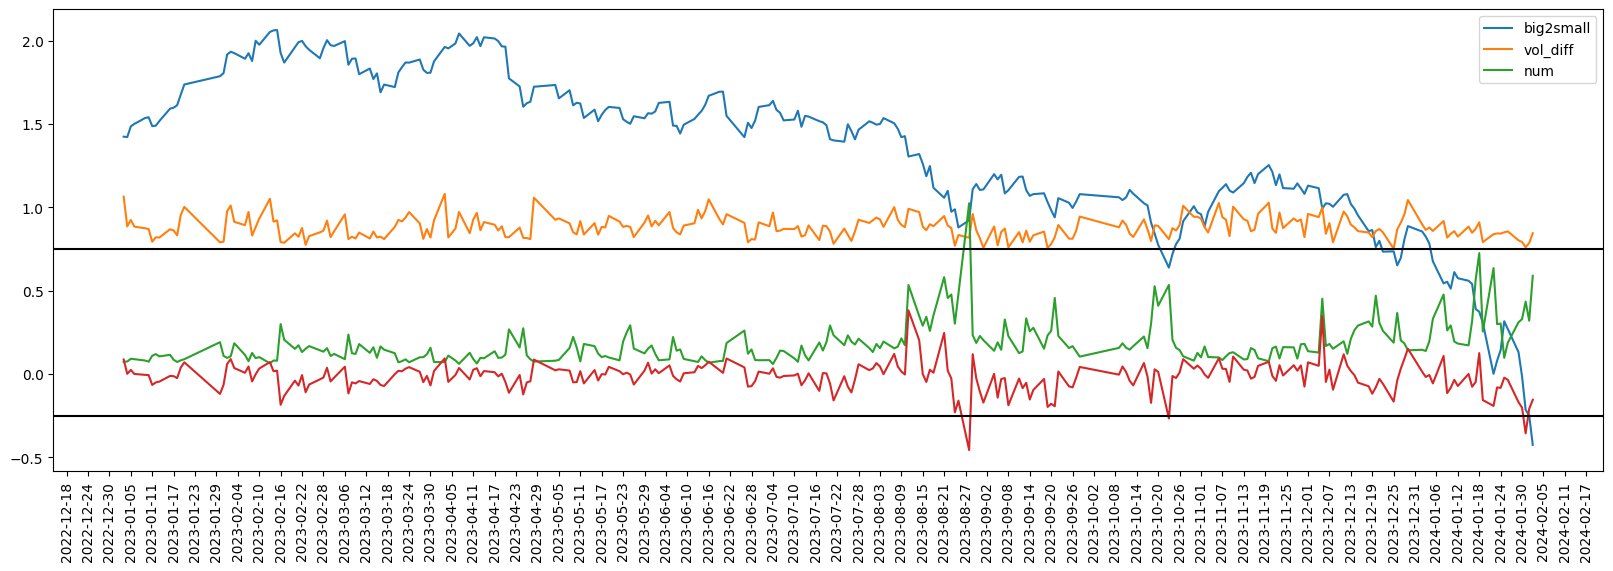

In [427]:
a = 0.2946
plt.rcParams["figure.figsize"] = (20,6)
df22 = df_choose
import matplotlib.ticker as ticker
fig, ax = plt.subplots(1,1)

ax.plot(df22["date"], df22["close"]/1000 -5, label=2) 
ax.plot(df22["date"], df22["senti_value"] * 3 , label=2)
# ax.plot(df22["date"], df22["sum_value"] , label=2)
ax.plot(df22["date"], (df22["num"]/20000 ) )
ax.plot(df22["date"], (df22["num"]/2000 ) *( df22["senti_value"] - a) * 2  , label=2)
# ax.plot(df22["date"], df22["volume_5_mean"]/6 + 0.4  , label=2)
# ax.plot(df22["datetime"], df22["small_vol_m"].rolling(12, min_periods=1).mean(), label=2)
# 
# ax.plot(df22["datetime"], df22["big_close"]  , label=1)
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=6))
ax.legend(["big2small", "vol_diff", "num"])
ax.axhline(-0.25, color="black")
ax.axhline(0.75, color="black")
# ax.axhline(50, color="black")
# ax.axhline(80, color="black")
plt.xticks(rotation=90)
plt.show()


In [275]:
df

,date,close,volume,date1,num,sum,senti_value,sum_value
0,2015-09-08,7651.500,12774965600,2015-09-08,1,0.890462,0.890462,196
1,2016-04-25,8232.478,8962202400,2016-04-25,1,0.999963,0.999963,119
2,2016-06-20,8457.932,12079272600,2016-06-20,1,0.999962,0.999962,83
3,2016-09-07,8897.797,12554006800,2016-09-07,1,0.999962,0.999962,140
4,2017-12-20,7041.500,7043984900,2017-12-20,1,0.995973,0.995973,135
...,...,...,...,...,...,...,...,...
971,2024-01-17,5389.122,10403735400,2024-01-17,11340,3293.320704,0.290416,13463
972,2024-01-18,5373.424,14871103600,2024-01-18,14506,4398.673375,0.303231,14490
973,2024-01-19,5306.986,10643108600,2024-01-19,5091,1343.141566,0.263827,6130
974,2024-01-22,5000.834,14425251200,2024-01-22,12699,3548.160283,0.279405,13657


In [272]:
df_choose[df_choose.num >4000][20:]

,date,close,volume,date1,num,sum,senti_value,sum_value
576,2022-06-08,6608.892,19632241500,2022-06-08,4138,1116.319473,0.269773,5480
580,2022-06-14,6665.253,20722404500,2022-06-14,5696,1902.418864,0.333992,8780
581,2022-06-15,6653.762,22859663500,2022-06-15,5270,1505.158070,0.285609,8682
591,2022-06-29,6900.993,22928002500,2022-06-29,4425,1139.565029,0.257529,5965
596,2022-07-06,6953.980,18211458500,2022-07-06,5142,1252.088370,0.243502,8620
...,...,...,...,...,...,...,...,...
970,2024-01-16,5539.474,11680310800,2024-01-16,6350,1794.050136,0.282528,8413
971,2024-01-17,5389.122,10403735400,2024-01-17,11340,3293.320704,0.290416,13463
972,2024-01-18,5373.424,14871103600,2024-01-18,14505,4398.664947,0.303252,14485
973,2024-01-19,5306.986,10643108600,2024-01-19,5091,1343.141566,0.263827,6130


In [123]:
df_choose.corr()

/tmp/ipykernel_3387134/465458749.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_choose.corr()


,close,volume,num,sum,senti_value
close,1.000000,0.603967,-0.394604,-0.347631,0.472970
volume,0.603967,1.000000,-0.012970,-0.000353,0.162274
num,-0.394604,-0.012970,1.000000,0.985539,-0.390182
sum,-0.347631,-0.000353,0.985539,1.000000,-0.256893
senti_value,0.472970,0.162274,-0.390182,-0.256893,1.000000


In [91]:
df_choose["close_pctchange"] = df_choose["close"].pct_change()

/tmp/ipykernel_3387134/3575503080.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_choose["close_pctchange"] = df_choose["close"].pct_change()


In [98]:
df_choose["senti_normal"] = (df_choose["num"]/8000 ) *( df_choose["senti_value"] - a)
df_choose["senti_normal3"] =  np.sqrt(df_choose["num"]) *( df_choose["senti_value"] - a)
df_choose["senti_normal2"] = np.log(df_choose["num"]) *( df_choose["senti_value"] - a)

/tmp/ipykernel_3387134/1802025910.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_choose["senti_normal"] = (df_choose["num"]/8000 ) *( df_choose["senti_value"] - a)
/tmp/ipykernel_3387134/1802025910.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_choose["senti_normal3"] =  np.sqrt(df_choose["num"]) *( df_choose["senti_value"] - a)
/tmp/ipykernel_3387134/1802025910.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [342]:
df_min[-20:]

,datetime2,close,vol,amount,datetime,num,sum,senti_value,sum_value
2084,2024-01-26 13:30:00,5311.86,116932872.0,1.169332e+10,2024-01-26 13:30:00,249,64.319196,0.258310,173
2085,2024-01-26 14:00:00,5317.76,115747904.0,1.157482e+10,2024-01-26 14:00:00,288,73.287159,0.254469,160
2086,2024-01-26 14:30:00,5278.81,130538160.0,1.305384e+10,2024-01-26 14:30:00,414,116.371925,0.281092,138
2087,2024-01-26 15:00:00,5269.76,186481904.0,1.864822e+10,2024-01-26 15:00:00,403,100.041738,0.248243,216
2088,2024-01-29 10:00:00,5244.19,485749632.0,4.857499e+10,2024-01-29 10:00:00,579,179.028189,0.309202,249
2089,2024-01-29 10:30:00,5186.85,192104144.0,1.921044e+10,2024-01-29 10:30:00,667,180.670470,0.270870,416
2090,2024-01-29 11:00:00,5173.77,125341472.0,1.253418e+10,2024-01-29 11:00:00,576,148.661381,0.258093,1093
2091,2024-01-29 11:30:00,5191.79,109721712.0,1.097220e+10,2024-01-29 11:30:00,484,106.171318,0.219362,291
2092,2024-01-29 13:30:00,5153.19,140913632.0,1.409140e+10,2024-01-29 13:30:00,488,128.572941,0.263469,323
2093,2024-01-29 14:00:00,5145.71,101390000.0,1.013903e+10,2024-01-29 14:00:00,484,137.423971,0.283934,236


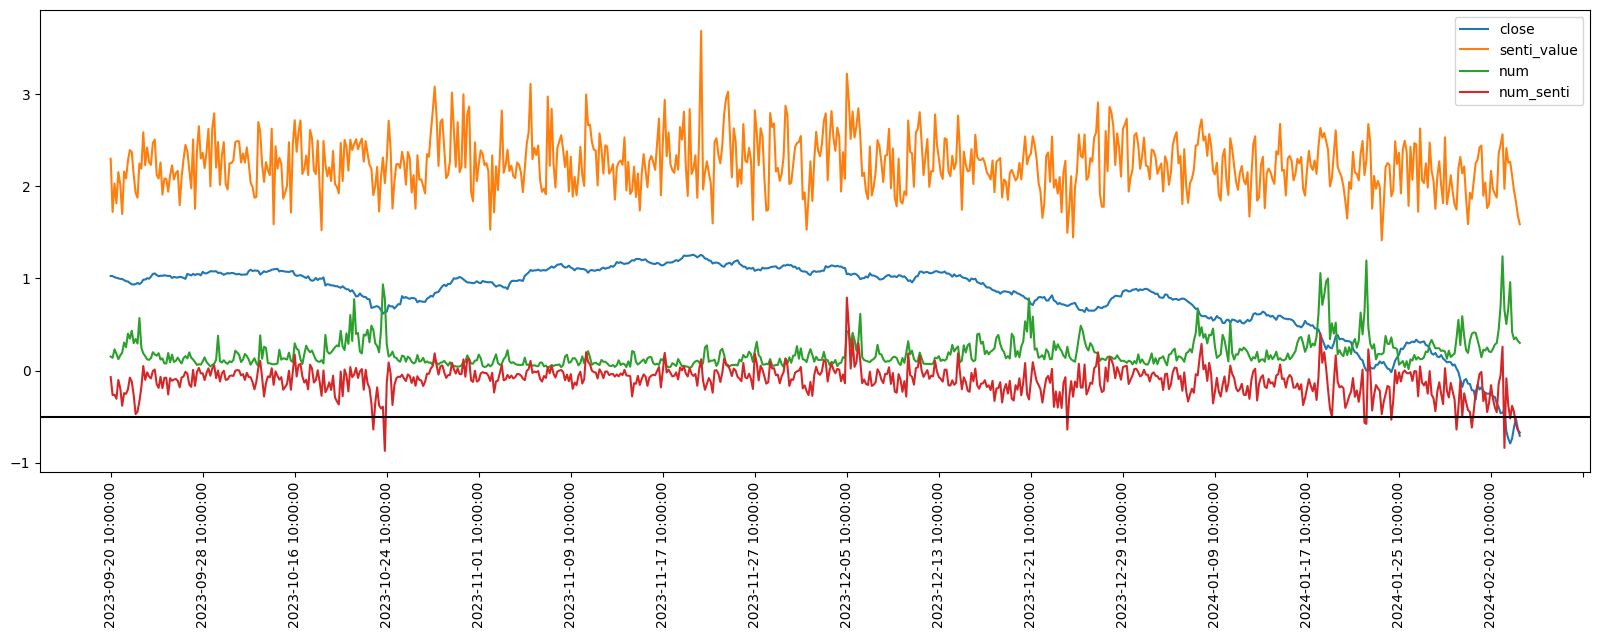

In [23]:
a = 0.31
plt.rcParams["figure.figsize"] = (20,6)
df22 = df_min[1400:]
import matplotlib.ticker as ticker
fig, ax = plt.subplots(1,1)

ax.plot(df22["datetime2"], df22["close"]/1000 -5, label=2) 
ax.plot(df22["datetime2"], df22["senti_value"] * 8 , label=2)
# ax.plot(df22["datetime2"], df22["sum_value"] , label=2)
ax.plot(df22["datetime2"], (df22["num"]/2000 ) )
ax.plot(df22["datetime2"], (df22["num"]/200 ) *( df22["senti_value"] - a) * 2  , label=2)
# ax.plot(df22["date"], df22["volume_5_mean"]/6 + 0.4  , label=2)
# ax.plot(df22["datetime"], df22["small_vol_m"].rolling(12, min_periods=1).mean(), label=2)
# 
# ax.plot(df22["datetime"], df22["big_close"]  , label=1)
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=48))
ax.legend(["close", "senti_value", "num", "num_senti"])
ax.axhline(-0.5, color="black")
# ax.axhline(50, color="black")
# ax.axhline(80, color="black")
plt.xticks(rotation=90)
plt.show()

In [431]:
df22[-20:]

,datetime2,close,vol,amount,datetime,num,sum,senti_value,sum_value
2108,2024-01-31 13:30:00,4859.00,99639424.0,9.963972e+09,2024-01-31 13:30:00,384,76.299867,0.198698,614
2109,2024-01-31 14:00:00,4855.88,115882512.0,1.158828e+10,2024-01-31 14:00:00,651,157.044072,0.241235,606
2110,2024-01-31 14:30:00,4787.93,142966128.0,1.429664e+10,2024-01-31 14:30:00,801,186.668390,0.233044,464
2111,2024-01-31 15:00:00,4785.03,178664592.0,1.786649e+10,2024-01-31 15:00:00,831,213.832192,0.257319,1263
2112,2024-02-01 10:00:00,4685.75,381647936.0,3.816482e+10,2024-02-01 10:00:00,820,230.756399,0.281410,566
2113,2024-02-01 10:30:00,4847.05,275366368.0,2.753667e+10,2024-02-01 10:30:00,663,189.613643,0.285993,150
2114,2024-02-01 11:00:00,4795.64,149785040.0,1.497853e+10,2024-02-01 11:00:00,496,150.125782,0.302673,288
2115,2024-02-01 11:30:00,4820.47,93010832.0,9.301114e+09,2024-02-01 11:30:00,291,88.823115,0.305234,282
2116,2024-02-01 13:30:00,4780.36,100027224.0,1.000275e+10,2024-02-01 13:30:00,455,107.970581,0.237298,415
2117,2024-02-01 14:00:00,4758.43,79524592.0,7.952488e+09,2024-02-01 14:00:00,438,111.780835,0.255207,372


In [ ]:





















............................